[тыц](https://www.kaggle.com/code/dhorvay/pytesseract-orientation-script-detection-osd)

In [1]:
!pip install -q pytesseract

In [27]:
# !pip install -q exif

In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,193 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [37]:
# !sudo apt install imagemagick

In [4]:
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Fetched 3,743 kB in 1s (3,355 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm lin

In [60]:
!sudo apt-get install tesseract-ocr-rus

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,271 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-rus all 1:4.00~git30-7274cfa-1.1 [1,271 kB]
Fetched 1,271 kB in 0s (3,508 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-rus.
(Readin

In [5]:
from PIL import Image as img
import pytesseract
import os
import numpy as np
import pandas as pd
from torchvision import transforms
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# from exif import Image

In [6]:
# Load languages and scripts
!git clone --recurse-submodules https://github.com/tesseract-ocr/tessdata_fast.git 2> /dev/null || (cd tessdata_fast; git pull)
!cp tessdata_fast/*.traineddata /usr/share/tesseract-ocr/4.00/tessdata/
!cp -r tessdata_fast/script /usr/share/tesseract-ocr/4.00/tessdata/

Submodule path 'tessconfigs': checked out '3decf1c8252ba6dbeef0bf908f4b0aab7f18d113'


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
SOURCE_DIR = 'drive/MyDrive/Colab Notebooks/405/data/r_test/'
TDIR = 'drive/MyDrive/Colab Notebooks/405/data/r/'
tr = transforms.Resize((4096, 4096))

In [9]:
id = []
answer = []
for fname in os.listdir(SOURCE_DIR):
  id.append(fname)
  a = fname.split('_')[-1]
  a = int(a.split('.')[0])
  if a == 1:
    answer.append(90)
  elif a == 2:
    answer.append(270)
  elif a == 3:
    answer.append(180)
  else:
    answer.append(0)
data = pd.DataFrame({'file': id, 'target': answer})
data.head()

,file,target
0,f7e99e856c8b48cab398adcf610362c5_1.jpg,90
1,44e7977a414b40c0936ad4112b573a62_2.jpg,270
2,83dbd73602ef4dae856e1d3ff285fa46_3.jpg,180
3,20e553bd763341749bfc5ef1b3837eb9_3.jpg,180
4,2d35efe89e5a4cc6bb394477a36b0209_1.jpg,90


In [10]:
data.shape

(416, 2)

In [26]:
# files = os.listdir(SOURCE_DIR)
# good_img = 0
# with open(SOURCE_DIR + '44e7977a414b40c0936ad4112b573a62_2.jpg', 'rb') as image_file:
#   my_image = Image(image_file)
# my_image.has_exif
# my_image.make='Python'
# my_image.has_exif
# dir(my_image)

In [90]:
preds = []
files = os.listdir(SOURCE_DIR)
for i in tqdm(range(len(files))):
  path = SOURCE_DIR + files[i]
  im = img.open(path)
  # im = tr(im)
  # display(im.resize(int(0.25*s) for s in im.size))
  try:
    osd = pytesseract.image_to_osd(im, output_type='dict')
  except:
    # im_r = transforms.functional.center_crop(im, [128, 128])
    # display(im_r)
    # im_r.save(TDIR + filename, dpi=(300,300))
    # im_1 = Image.open(TDIR + filename)
    # osd = pytesseract.image_to_osd(im, output_type='dict')
    osd = {'rotate': 'unknown'}
  # print(filename, '---', osd)
  preds.append(osd['rotate'])

100%|██████████| 416/416 [07:18<00:00,  1.05s/it]


In [91]:
data['predictions'] = preds

In [92]:
data.head()

,file,target,predictions
0,f7e99e856c8b48cab398adcf610362c5_1.jpg,90,unknown
1,44e7977a414b40c0936ad4112b573a62_2.jpg,270,270
2,83dbd73602ef4dae856e1d3ff285fa46_3.jpg,180,unknown
3,20e553bd763341749bfc5ef1b3837eb9_3.jpg,180,unknown
4,2d35efe89e5a4cc6bb394477a36b0209_1.jpg,90,unknown


In [93]:
data_1 = data.loc[data['predictions'] != 'unknown']
data_1.shape

(196, 3)

PRECISION --- 0.89
RECALL --- 0.89
ACCURACY --- 0.89
F1 --- 0.89


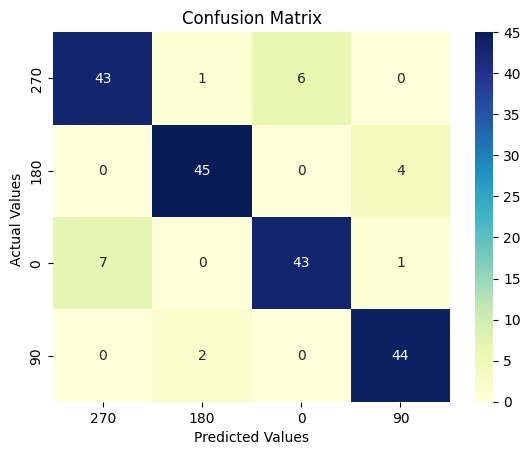

In [94]:
y_pred = np.array(data_1['target']).astype('float')
y_real = np.array(data_1['predictions']).astype('float')
conf_mx = pd.DataFrame(confusion_matrix(y_real, y_pred))

ax = sns.heatmap(conf_mx, annot= True , fmt="d",  cmap='YlGnBu')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(data_1['target'].unique())
ax.yaxis.set_ticklabels(data_1['target'].unique())
print(f'PRECISION --- {precision_score(y_real, y_pred, average="macro"):.2}')
print(f'RECALL --- {recall_score(y_real, y_pred, average="macro"):.2}')
print(f'ACCURACY --- {accuracy_score(y_real, y_pred):.2}')
print(f'F1 --- {f1_score(y_real, y_pred, average="macro"):.2}')